In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Forecast Confidence Intervals

Time series forecast models can both make predictions and provide a confidence interval for
those predictions. Confidence intervals provide an upper and lower expectation for the real
observation.

### ARIMA Forecast

The ARIMA implementation in the Statsmodels Python library can be used to fit an ARIMA
model.  It returns an ARIMAResults object.  This object provides the forecast() function that can 
be used to make predictions about future time steps and default to predicting the value at the next 
time step after the end of the training data.  Assuming we are predicting just the next time step, 
the forecast() method returns three values:

* Forecast.  The forecasted value in the units of the training time series.
* Standard error.  The standard error for the model.
* Confidence interval.  The 95% confidence interval for the forecast.

In this tutorial, we will better understand the confidence interval provided with an ARIMA 
forecast.  Before we dive in, let’s first look at the Daily Female Births dataset that we will use
as the context for this tutorial.


### Forecast Confidence Interval

In this section, we will train an ARIMA model, use it to make a prediction, and inspect the
confidence interval. First, we will split the training dataset into a training and test dataset.
Almost all observations will be used for training and we will hold back the last single observation
as a test dataset for which we will make a prediction.

In [4]:
from statsmodels.tsa.arima_model import ARIMA

df = pd.read_csv('./dataset/daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [9]:
from sklearn.model_selection import TimeSeriesSplit

X = df.values
splits = TimeSeriesSplit(n_splits=4)

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print(f'train: {len(train)}, test: {len(test)}')

# fit an ARIMA model 
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)

# forecast
forecast, stderr, conf = model_fit.forecast()

# summarize forecast and confidence intervals
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

train: 73, test: 73
train: 146, test: 73
train: 219, test: 73
train: 292, test: 73
Expected: 42.000
Forecast: 47.095
Standard Error: 7.062
95% Confidence Interval: 33.254 to 60.935


## Interpreting the Confidence Interval

The forecast() function allows the confidence interval to be specified.  The alpha argument
on the forecast() function specifies the confidence level.  It is set by default to alpha=0.05, 
which is a 95% confidence interval.  This is a sensible and widely used confidence interval.  An 
alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the 
forecast where there is a only a 5% chance that the real value will not be in that range.

Put another way, the 95% confidence interval suggests that there is a high likelihood that the real 
observation will be within the range.  In the above example, the forecast was 45.878. The 95% 
confidence interval suggested that the real observation was highly likely to fall within the range 
of values between 32.167 and 59.590.  The real observation was 50.0 and was well
within this range.  We can tighten the range of likely values a few ways:

* We can ask for a range that is narrower but increases the statistical likelihood of a real observation falling outside of the range.
* We can develop a model that has more predictive power and in turn makes more accurate predictions.

Further, the confidence interval is also limited by the assumptions made by the model, such
as the distribution of errors made by the model fit a Gaussian distribution with a zero mean
value (e.g. white noise). Extending the example above, we can report our forecast with a few
different commonly used confidence intervals of 80%, 90%, 95% and 99%. The complete example
is listed below.

In [11]:
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Confidence Interval: 47.095 between 38.045 and 56.145
90.0% Confidence Interval: 47.095 between 35.480 and 58.710
95.0% Confidence Interval: 47.095 between 33.254 and 60.935
99.0% Confidence Interval: 47.095 between 28.905 and 65.284


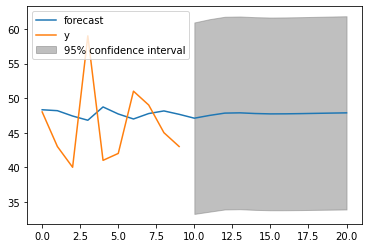

In [16]:
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+10)
plt.legend(loc='upper left')
plt.show()